## 1. Understand the data.
<p>Many Myanmar people have moved to Thailand. Hence, Accurate prediction of housing prices will aid Myanmar people in making informed decisions regarding buying, selling, or renting properties, maximizing returns on investment. </p>
<p>Step 1: Reading the data</p>

In [1]:
# Importing the pandas package
import pandas as pd

# Reading in house_CM.csv, which is comma delimited.
df=pd.read_csv('condo_price_cm.csv', index_col = 0)

# Print the number of features, number of data points
print(df.shape)

# Print the name of the features of the data points
print(df.columns)

# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

# Print the information of the dataset and check data types
df.info()

(201, 4)
Index(['Area ', 'Prices', 'bathroom', 'Place'], dtype='object')
Index(['Area', 'Prices', 'bathroom', 'Place'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      201 non-null    int64 
 1   Prices    201 non-null    int64 
 2   bathroom  201 non-null    int64 
 3   Place     201 non-null    object
dtypes: int64(3), object(1)
memory usage: 7.9+ KB


## 2. Data Preprocessing
<p>Data preprocessing is a critical step in machine learning that involves transforming raw data into a format that is suitable for analysis and modeling. It's an essential part of the machine learning pipeline because the quality of the data directly impacts the performance and accuracy of the models built upon it.</p>

In [2]:
import numpy as np

# Select the feature 'bathroom'
sel_feature = 'Area'

X=df[[sel_feature]]
Y=df['Prices']

# standardize the features using the feature scaling

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
Y=np.array((Y-Y.mean())/Y.std())


## 3. Gradient Descent Algorithm
<p>Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning models, particularly in training processes like linear regression, logistic regression, neural networks, and more. </p>
<p>The goal of Gradient Descent is to find the parameters (coefficients) of the model that minimize the cost function, making the model perform better at predicting the target variable.</p>

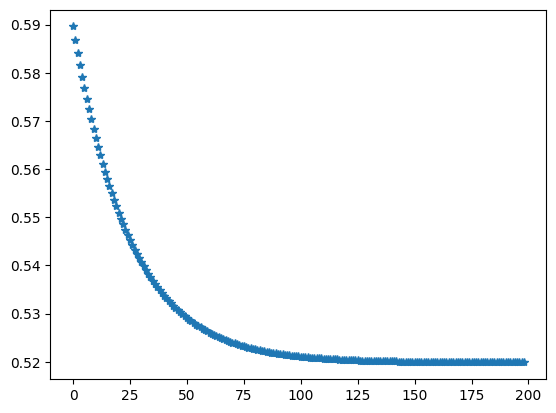

In [3]:
import random

##This function initializes the parameters (coefficients) of the model.
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

##This function computes the predicted values (Y_hat) based on the input features (X) and the model parameters (b and a).
def predict_Y(b,a,X):
    return b + np.dot(X,a)

##This function computes the cost between the actual target values (Y) and the predicted values (Y_hat).
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

##This function updates the parameters (b_0 and theta_o) using gradient descent based on the gradients and the learning rate.
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

#This function performs the gradient descent optimization process for linear regression.
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])
    
    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0 
    
    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1   
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta
        
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)


# import matplotlib for visualization
import matplotlib.pyplot as plt

# plot the results

plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'], "*")

## 4. Check the parameters
<p>Retrieves the value of the parameters corresponding to the minimum cost.</p>

In [4]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]

# print the values of the parameters 
print('Best parameters found at index', idx)
print(best_parameters)

Best parameters found at index 198
value_b         0.003973
value_weight    0.693711
Name: 198, dtype: float64


## 5. Perform the predictions
<p>Now that we have identified the best parameters corresponding to the minimum cost. Make predictions using the best parameters obtained from the Gradient Descent optimization. </p>

In [5]:
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*X
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X

## 6. Visualize the results.
<p>Draw a scatter plot to visualize the relationship between the selected program variable (sel_feature) and the sales data, along with the predicted sales based on initial and best parameters obtained from a gradient descent optimization process.</p>

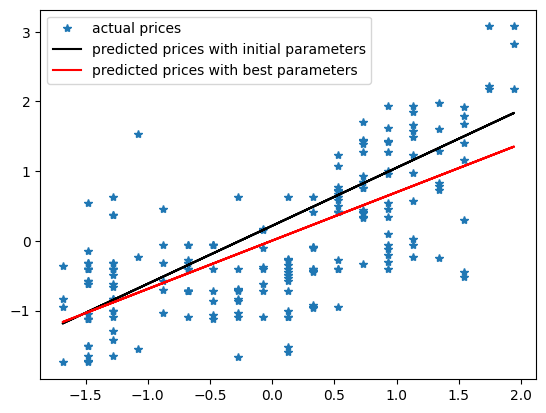

In [6]:
# import matplotlib for visualization
import matplotlib.pyplot as plt

# plot the actual data points
plt.plot(X, Y, '*')

plt.plot(X,  y_ini, 'k', X, y_hat, 'r')
plt.legend(['actual prices', 'predicted prices with initial parameters',
            'predicted prices with best parameters'])
plt.show()

## 7. Submit for the grade.
<p>Change the below cell code for the final submission</p>

In [7]:
# Edit the below code to change to your name.
name = "student name"
print("Submitted by", name)

Submitted by student name
